In [1]:
#regression
#In this notebook we will try to predict the price of the diamond and our question would be:
#Can we predict the diamond's price based on the other features?

In [2]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [3]:
#Reading the dataset
diamond=pd.read_csv(r"C:\Users\ariki\diamonds.csv") 

In [4]:
#Shot the first 10 rows of the dataset
diamond.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
diamond['clarity'].count()

53940

In [6]:
#Drop the unnamed col cause we already has a col of count
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [7]:
#Checking if there is null in each column in the dataset
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
#look at some sumarry statistics of the dataframe
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
#After we dound out that the x,y,z each of them has a value 0 which not make sense
#becuase the value should be higher than 0 we will drop all the rows
#with the value 0 in the columns x,y,z.
#First we will check how much rows have this, then we will drop them and show the sumarry statistics of the data again.
len(diamond.loc[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)])

20

In [10]:
diamond = diamond.drop(diamond.loc[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)].index)
diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002049EA639E8>,
      dtype=object)

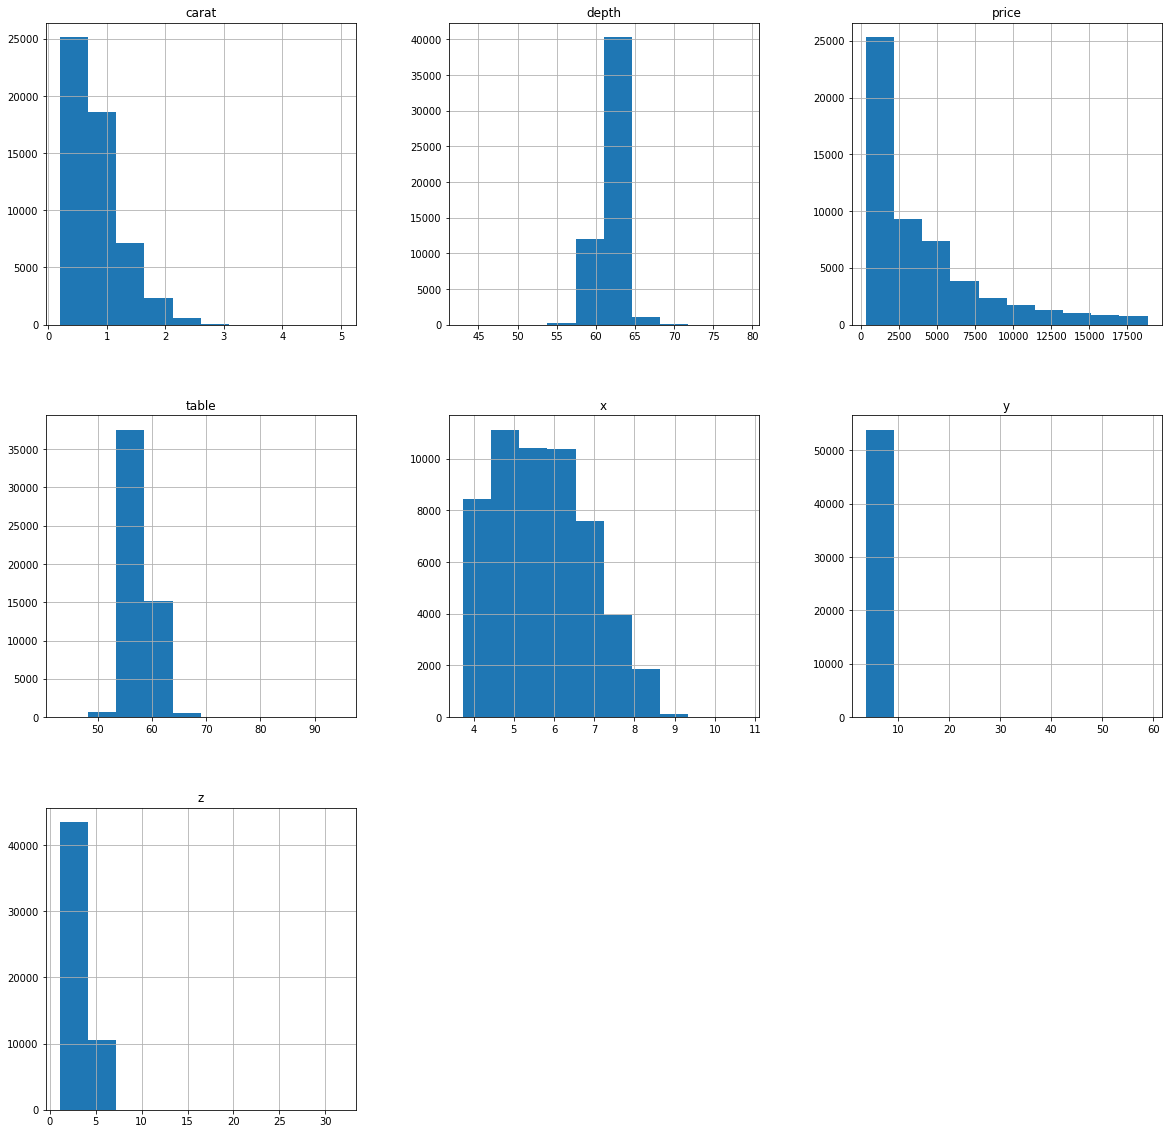

In [11]:
#Showing every feature in its own graph
#The string features i will show in columns diagram
#histograma
diamond.hist(figsize=(20,20))

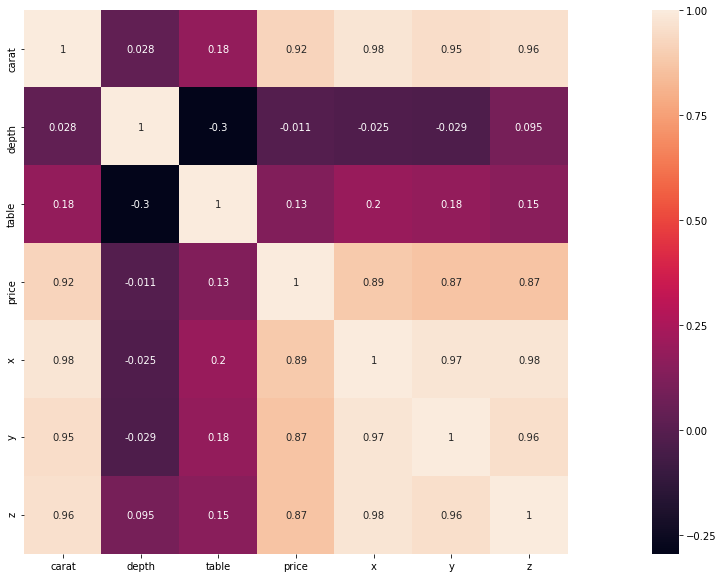

In [12]:
# Correlation Map
corr = diamond.corr()
plt.figure(figsize = (30,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [13]:
# explanation
# Depth is inversely related to Price.

# The Price of the Diamond is highly correlated to Carat, and its Dimensions.

# The carat of a diamond has the most significant impact on its Price.

# The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

c:\python\python36\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


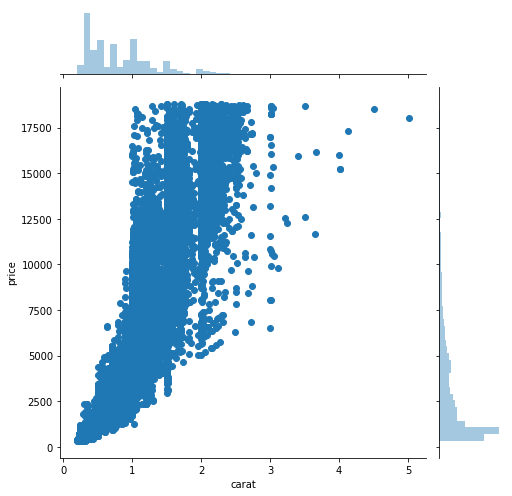

In [14]:
sns.jointplot(x='carat' , y='price' , data=diamond , size=7)

In [15]:
# as while carat becomes higher price increasingly much more.

c:\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


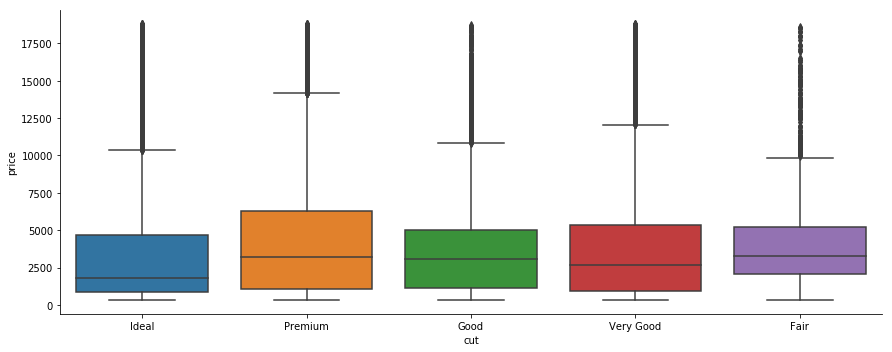

In [16]:
sns.factorplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )

In [17]:
# Understanding Box Plot :

# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

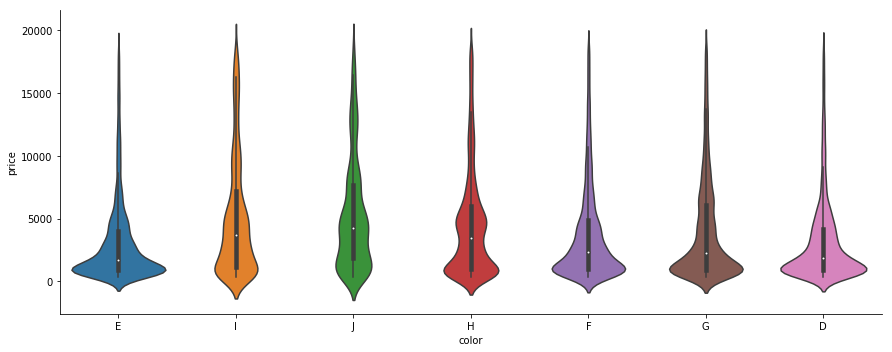

In [18]:
sns.factorplot(x='color', y='price' , data=diamond , kind='violin', aspect=2.5)

c:\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


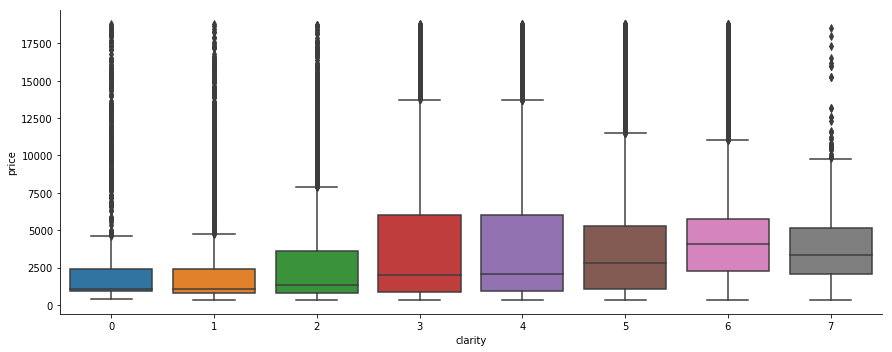

In [51]:
sns.factorplot(x='clarity', y='price', data=diamond , kind = "box",aspect=2.5)

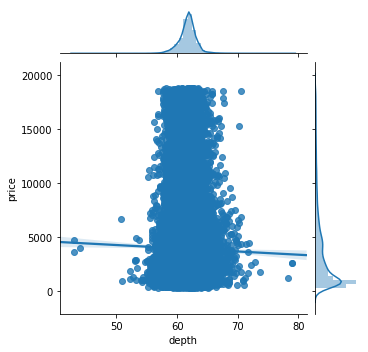

In [20]:
sns.jointplot(x='depth', y='price' , data=diamond , kind='regplot', size=5)

In [21]:
# We can Infer from the plot that the Price can vary heavily for the same Depth.

(2, 10)

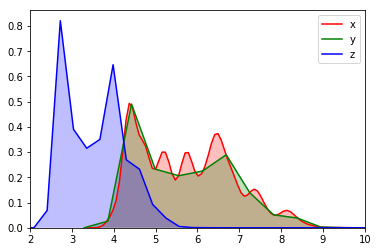

In [23]:
sns.kdeplot(diamond['x'] ,shade=True , color='r' )
sns.kdeplot(diamond['y'] , shade=True , color='g' )
sns.kdeplot(diamond['z'] , shade= True , color='b')
plt.xlim(2,10)

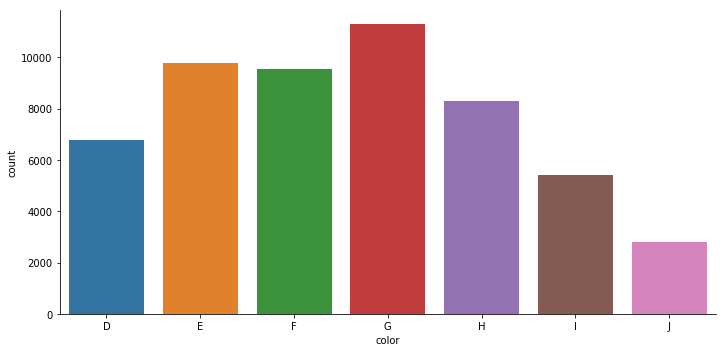

In [24]:
#Count the diamonds for each color from D to J
sns.factorplot(x='color', data=diamond, kind = 'count' ,aspect=2, order = 'DEFGHIJ' )

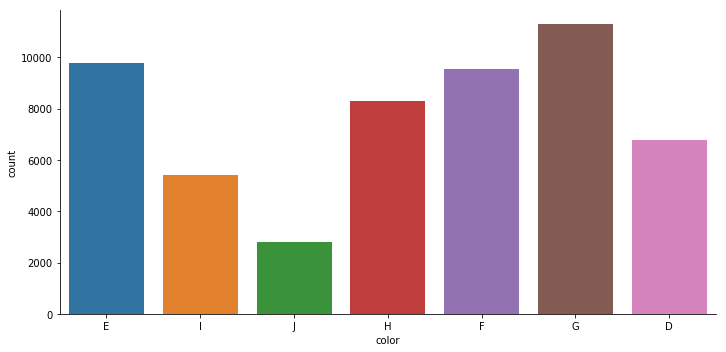

In [25]:
sns.factorplot(x='color', data=diamond, kind = 'count' ,aspect=2 )

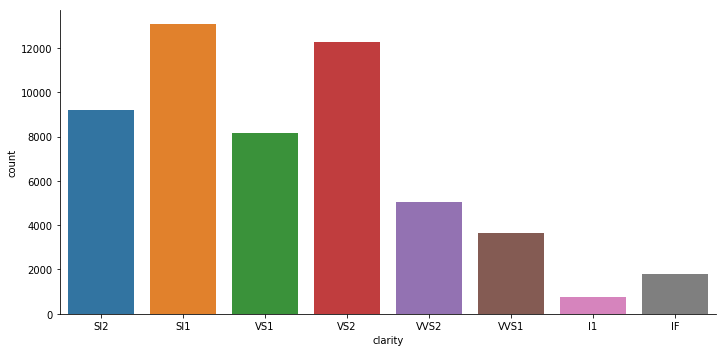

In [26]:
#Count the diamonds for each clarity 
sns.factorplot(x='clarity', data=diamond, kind = 'count' ,aspect=2)

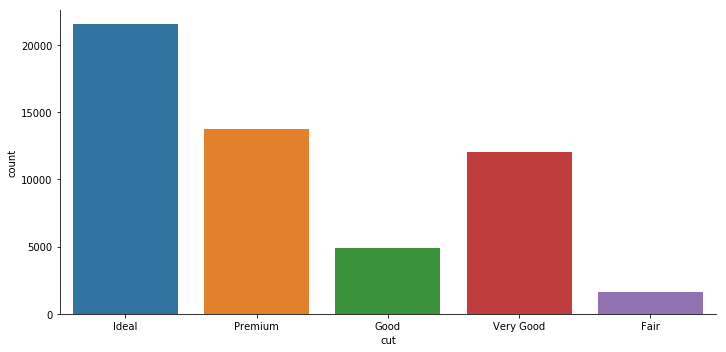

In [27]:
#Count the diamonds for each quality of the cut
sns.factorplot(x='cut', data=diamond, kind = 'count' ,aspect=2 )

In [28]:
#As we can't feed String data for Modelling, we will change the columns - cut, clarity and color to num values
#To do that mission we will use the function that change string to num - fit_transform()
lb_cut = LabelEncoder()
lb_color = LabelEncoder()

diamond['cut'] = lb_cut.fit_transform(diamond['cut'])
diamond['color'] = lb_color.fit_transform(diamond['color'])


diamond_clarity = {'I1':7,
                   'SI2':6,
                   'SI1':5,
                   'VS2':4,
                   'VS1':3,
                   'VVS2':2,
                   'VVS1':1,
                   'IF':0}
diamond.clarity = diamond.clarity.map(diamond_clarity);

In [29]:
len(diamond[diamond['price'] > 18000])

309

In [30]:
#Cut - 'fair' = 0(worst), 'good' = 1, 'very good' = 2, 'premium' = 3 , 'ideal' = 4(best)
#color - 'D' = 0(best), 'E' = 1, 'F' = 2, 'G' = 3, 'H' = 4, 'I' = 5 , 'J' = 6(worst)
#Clarity - 'I1':7(worst), 'SI2':6, 'SI1':5, 'VS2':4, 'VS1':3, 'VVS2':2, 'VVS1':1, 'IF':0(best)

In [31]:
#Modeling
#First we will define X , Y - x = all the features except the feature 'price' and y = 'price'.
#Second we will divide our dataset into testing and training dataset.

X = diamond.drop(['price'], axis=1)
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=4) #split the data to training and testing dataset

In [32]:
#Linear Regression

#import the model
from sklearn.linear_model import LinearRegression 

#create the model
linerg = LinearRegression() 

#Enter the data training to the model
linerg.fit(X_train, y_train) 

#Accuracy percentages
accuracy = linerg.score(X_test,y_test)

print('% Linear regression accuracy: ', accuracy*100)



% Linear regression accuracy:  91.09782516419837


In [33]:
#Random Forest Regressor

#import the model
from sklearn.ensemble import RandomForestRegressor

#create the model
rand_fo = RandomForestRegressor(n_estimators = 100) #create the model, The number of trees in the forest.

#Enter the data training to the model, build a forest of trees from the training set.
rand_fo.fit(X_train , y_train)

#Accuracy percentages
accuracy =  rand_fo.score(X_test, y_test)

print('% Random forest regression accuracy:', accuracy*100)


% Random forest regression accuracy: 98.18497869015098


In [47]:
#adaboost
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor 
from sklearn.model_selection import cross_val_score
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('Score : ' , clf_ar.score(X_test, y_test))
print(accuracies)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.4s finished


Score :  0.8978181703669749
[0.83483604 0.88882657 0.90520593 0.89118365 0.91512611]


In [57]:
# Gradient boosting
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('Score ' , clf_gbr.score(X_test, y_test))


      Iter       Train Loss   Remaining Time 
         1    14190822.9190            1.19s
         2    12582265.7149            1.06s
         3    11246946.8131            1.01s
         4    10052862.8482            1.00s
         5     9071821.6297            0.99s
         6     8184052.5169            0.99s
         7     7452795.4452            0.96s
         8     6812751.4034            0.95s
         9     6246895.8381            0.97s
        10     5770942.0131            0.94s
        20     3208304.7696            0.77s
        30     2388503.2754            0.64s
        40     2081065.6857            0.53s
        50     1885242.0946            0.44s
        60     1735471.2568            0.35s
        70     1616795.3540            0.26s
        80     1522422.0240            0.17s
        90     1445577.0129            0.09s
       100     1384308.1517            0.00s
      Iter       Train Loss   Remaining Time 
         1    14268038.8835            0.79s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        10     5793249.6817            0.71s
        20     3214654.0733            0.57s
        30     2389869.3629            0.47s
        40     2080662.1557            0.40s
        50     1883819.0105            0.34s
        60     1732502.4473            0.26s
        70     1613463.5406            0.20s
        80     1518610.0674            0.13s
        90     1441777.2909            0.06s
       100     1380318.5547            0.00s
      Iter       Train Loss   Remaining Time 
         1    14210265.9740            0.72s
         2    12596684.5814            0.77s
         3    11254218.8335            0.73s
         4    10062407.7265            0.71s
         5     9085028.5281            0.70s
         6     8195196.8695            0.68s
         7     7465340.4146            0.68s
         8     6827510.9840            0.67s
         9     6262190.2174            0.64s
        10     5784702.7838            0.64s
        20     3215548.8712            0.52s
        3

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished
